In [10]:
import h5py
import numpy as np
import pandas as pd
import tensorflow as tf
import pickle
from sklearn.preprocessing import OneHotEncoder
from tensorflow.keras.models import  clone_model
import pathlib
from tqdm import tqdm
import sys
import os
import json

In [11]:
try:
    from google.colab import drive
    drive.mount('/content/drive')
    root_path=f'/content/drive/MyDrive/Colab Notebooks/concept-drift-online'
except:
    root_path = pathlib.Path(f'../').resolve()

In [ ]:
attack_vector='network' #cache
machine_setting='static_browser_version' # dynamic_browser_version

data_path=f'{root_path}/data/{machine_setting}/{attack_vector}'
model_0_train_path=f'2021_08_27/train.h5'


In [13]:
os.getcwd()

''

In [14]:
sys.path.append(str(root_path)) # Add the directory to the path
from utils import load_hdf5_data, prepare_hdf5_data,get_data_paths_ordered,standartize,cache_countermeasure,network_countermeasure


In [15]:

import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))


Num GPUs Available:  0


In [17]:
model_path=f'{data_path}/models/cnn_lstm.keras'
le_dir=f'{data_path}/models/label_encoder_100.pkl'
model0 = tf.keras.models.load_model(model_path)
with open(le_dir, 'rb') as f:
    le = pickle.load(f)

In [18]:
ordered_paths=get_data_paths_ordered(data_path)

In [19]:
batch = 32
max_epochs = 20

top_noise_function= cache_countermeasure if attack_vector=='cache' else network_countermeasure 
noise_params={'noise_std': [0, 0.1, 0.2, 0.3]} if attack_vector=='cache' else {'noise_std': [0, 300, 600, 900], 'inserting_noise_p': [0, 0.3, 0.6, 0.9]} 


results = {}

for dct in pd.DataFrame( noise_params).to_dict(orient='records'):

  results[json.dumps(dct)] = {}
  for path in tqdm(ordered_paths):
      curr_date_i = path.stem
      test_path_i = (path/'test.h5').as_posix()
      X_test_i, y_test_i = load_hdf5_data(test_path_i,le)
      noise_function = lambda x: top_noise_function(x, **dct)

      # Prepare data using prepare_hdf5_data with the loaded data
      test_datasets_i = prepare_hdf5_data(X_test_i, y_test_i, batch_size=batch, sample_validation=-1,noise_function=noise_function)['data']
          # Make predictions
      all_predictions = []
      all_true_labels = []
      for features, labels in test_datasets_i:
          batch_predictions = model0.predict_on_batch(features)
          all_predictions.append(batch_predictions)
          all_true_labels.append(labels.numpy()) # Convert label tensor to NumPy array

      pred_i = np.concatenate(all_predictions, axis=0)
      y_testi = np.concatenate(all_true_labels, axis=0)

      acci=(y_testi.argmax(axis=1)==pred_i.argmax(axis=1)).mean()
      results[json.dumps(dct)].update({curr_date_i:acci})
      print(f'accuracy: {acci} for date: {curr_date_i} with noise: {json.dumps(dct)}')

  4%|▍         | 1/26 [00:01<00:44,  1.77s/it]

accuracy: 0.846 for date: 2021_08_27 with noise: {"noise_std": 0.0}


  8%|▊         | 2/26 [00:03<00:38,  1.62s/it]

accuracy: 0.796 for date: 2021_09_05 with noise: {"noise_std": 0.0}


 12%|█▏        | 3/26 [00:04<00:36,  1.59s/it]

accuracy: 0.852 for date: 2021_09_12 with noise: {"noise_std": 0.0}


 15%|█▌        | 4/26 [00:06<00:34,  1.57s/it]

accuracy: 0.854 for date: 2021_09_24 with noise: {"noise_std": 0.0}


 19%|█▉        | 5/26 [00:07<00:32,  1.54s/it]

accuracy: 0.834 for date: 2021_09_28 with noise: {"noise_std": 0.0}


 23%|██▎       | 6/26 [00:09<00:30,  1.52s/it]

accuracy: 0.82 for date: 2021_10_03 with noise: {"noise_std": 0.0}


 27%|██▋       | 7/26 [00:10<00:28,  1.51s/it]

accuracy: 0.805 for date: 2021_10_10 with noise: {"noise_std": 0.0}


 31%|███       | 8/26 [00:12<00:27,  1.51s/it]

accuracy: 0.7675350701402806 for date: 2021_10_17 with noise: {"noise_std": 0.0}


 35%|███▍      | 9/26 [00:13<00:25,  1.53s/it]

accuracy: 0.7925430210325047 for date: 2021_10_24 with noise: {"noise_std": 0.0}


 38%|███▊      | 10/26 [00:15<00:24,  1.52s/it]

accuracy: 0.699 for date: 2021_10_31 with noise: {"noise_std": 0.0}


 42%|████▏     | 11/26 [00:16<00:22,  1.51s/it]

accuracy: 0.735 for date: 2021_11_07 with noise: {"noise_std": 0.0}


 46%|████▌     | 12/26 [00:18<00:21,  1.52s/it]

accuracy: 0.701 for date: 2021_11_14 with noise: {"noise_std": 0.0}


 50%|█████     | 13/26 [00:19<00:19,  1.52s/it]

accuracy: 0.731 for date: 2021_11_21 with noise: {"noise_std": 0.0}


 54%|█████▍    | 14/26 [00:21<00:18,  1.56s/it]

accuracy: 0.75 for date: 2021_11_28 with noise: {"noise_std": 0.0}


 58%|█████▊    | 15/26 [00:23<00:17,  1.58s/it]

accuracy: 0.741 for date: 2021_12_05 with noise: {"noise_std": 0.0}


 62%|██████▏   | 16/26 [00:24<00:15,  1.59s/it]

accuracy: 0.73 for date: 2021_12_12 with noise: {"noise_std": 0.0}


 65%|██████▌   | 17/26 [00:26<00:14,  1.61s/it]

accuracy: 0.733 for date: 2021_12_19 with noise: {"noise_std": 0.0}


 69%|██████▉   | 18/26 [00:28<00:12,  1.62s/it]

accuracy: 0.6955223880597015 for date: 2021_12_26 with noise: {"noise_std": 0.0}


 73%|███████▎  | 19/26 [00:29<00:11,  1.64s/it]

accuracy: 0.7431372549019608 for date: 2022_01_02 with noise: {"noise_std": 0.0}


 77%|███████▋  | 20/26 [00:31<00:09,  1.64s/it]

accuracy: 0.7178217821782178 for date: 2022_01_09 with noise: {"noise_std": 0.0}


 81%|████████  | 21/26 [00:33<00:08,  1.65s/it]

accuracy: 0.7144278606965174 for date: 2022_01_16 with noise: {"noise_std": 0.0}


 85%|████████▍ | 22/26 [00:34<00:06,  1.64s/it]

accuracy: 0.715 for date: 2022_01_23 with noise: {"noise_std": 0.0}


 88%|████████▊ | 23/26 [00:36<00:04,  1.64s/it]

accuracy: 0.707 for date: 2022_01_30 with noise: {"noise_std": 0.0}


 92%|█████████▏| 24/26 [00:38<00:03,  1.64s/it]

accuracy: 0.717 for date: 2022_02_06 with noise: {"noise_std": 0.0}


 96%|█████████▌| 25/26 [00:39<00:01,  1.72s/it]

accuracy: 0.168141592920354 for date: 2022_02_16 with noise: {"noise_std": 0.0}


100%|██████████| 26/26 [00:41<00:00,  1.60s/it]


accuracy: 0.631 for date: 2022_02_21 with noise: {"noise_std": 0.0}


  4%|▍         | 1/26 [00:01<00:40,  1.62s/it]

accuracy: 0.758 for date: 2021_08_27 with noise: {"noise_std": 0.1}


  8%|▊         | 2/26 [00:03<00:38,  1.62s/it]

accuracy: 0.708 for date: 2021_09_05 with noise: {"noise_std": 0.1}


 12%|█▏        | 3/26 [00:04<00:37,  1.62s/it]

accuracy: 0.786 for date: 2021_09_12 with noise: {"noise_std": 0.1}


 15%|█▌        | 4/26 [00:06<00:36,  1.64s/it]

accuracy: 0.725 for date: 2021_09_24 with noise: {"noise_std": 0.1}


 19%|█▉        | 5/26 [00:08<00:34,  1.65s/it]

accuracy: 0.71 for date: 2021_09_28 with noise: {"noise_std": 0.1}


 23%|██▎       | 6/26 [00:09<00:32,  1.64s/it]

accuracy: 0.697 for date: 2021_10_03 with noise: {"noise_std": 0.1}


 27%|██▋       | 7/26 [00:11<00:31,  1.65s/it]

accuracy: 0.702 for date: 2021_10_10 with noise: {"noise_std": 0.1}


 31%|███       | 8/26 [00:13<00:29,  1.64s/it]

accuracy: 0.6593186372745491 for date: 2021_10_17 with noise: {"noise_std": 0.1}


 35%|███▍      | 9/26 [00:14<00:28,  1.67s/it]

accuracy: 0.7007648183556405 for date: 2021_10_24 with noise: {"noise_std": 0.1}


 38%|███▊      | 10/26 [00:16<00:26,  1.65s/it]

accuracy: 0.616 for date: 2021_10_31 with noise: {"noise_std": 0.1}


 42%|████▏     | 11/26 [00:18<00:24,  1.65s/it]

accuracy: 0.628 for date: 2021_11_07 with noise: {"noise_std": 0.1}


 46%|████▌     | 12/26 [00:19<00:23,  1.65s/it]

accuracy: 0.612 for date: 2021_11_14 with noise: {"noise_std": 0.1}


 50%|█████     | 13/26 [00:21<00:21,  1.65s/it]

accuracy: 0.632 for date: 2021_11_21 with noise: {"noise_std": 0.1}


 54%|█████▍    | 14/26 [00:23<00:19,  1.65s/it]

accuracy: 0.655 for date: 2021_11_28 with noise: {"noise_std": 0.1}


 58%|█████▊    | 15/26 [00:24<00:18,  1.66s/it]

accuracy: 0.628 for date: 2021_12_05 with noise: {"noise_std": 0.1}


 62%|██████▏   | 16/26 [00:26<00:16,  1.65s/it]

accuracy: 0.632 for date: 2021_12_12 with noise: {"noise_std": 0.1}


 65%|██████▌   | 17/26 [00:28<00:14,  1.65s/it]

accuracy: 0.625 for date: 2021_12_19 with noise: {"noise_std": 0.1}


 69%|██████▉   | 18/26 [00:29<00:13,  1.64s/it]

accuracy: 0.6059701492537314 for date: 2021_12_26 with noise: {"noise_std": 0.1}


 73%|███████▎  | 19/26 [00:31<00:11,  1.65s/it]

accuracy: 0.653921568627451 for date: 2022_01_02 with noise: {"noise_std": 0.1}


 77%|███████▋  | 20/26 [00:32<00:09,  1.64s/it]

accuracy: 0.6128712871287129 for date: 2022_01_09 with noise: {"noise_std": 0.1}


 81%|████████  | 21/26 [00:34<00:08,  1.64s/it]

accuracy: 0.609950248756219 for date: 2022_01_16 with noise: {"noise_std": 0.1}


 85%|████████▍ | 22/26 [00:36<00:06,  1.64s/it]

accuracy: 0.591 for date: 2022_01_23 with noise: {"noise_std": 0.1}


 88%|████████▊ | 23/26 [00:37<00:04,  1.64s/it]

accuracy: 0.595 for date: 2022_01_30 with noise: {"noise_std": 0.1}


 92%|█████████▏| 24/26 [00:39<00:03,  1.64s/it]

accuracy: 0.613 for date: 2022_02_06 with noise: {"noise_std": 0.1}


 96%|█████████▌| 25/26 [00:41<00:01,  1.71s/it]

accuracy: 0.168141592920354 for date: 2022_02_16 with noise: {"noise_std": 0.1}


100%|██████████| 26/26 [00:43<00:00,  1.65s/it]


accuracy: 0.536 for date: 2022_02_21 with noise: {"noise_std": 0.1}


  4%|▍         | 1/26 [00:01<00:41,  1.66s/it]

accuracy: 0.558 for date: 2021_08_27 with noise: {"noise_std": 0.2}


  8%|▊         | 2/26 [00:03<00:39,  1.63s/it]

accuracy: 0.522 for date: 2021_09_05 with noise: {"noise_std": 0.2}


 12%|█▏        | 3/26 [00:04<00:37,  1.63s/it]

accuracy: 0.545 for date: 2021_09_12 with noise: {"noise_std": 0.2}


 15%|█▌        | 4/26 [00:06<00:36,  1.64s/it]

accuracy: 0.528 for date: 2021_09_24 with noise: {"noise_std": 0.2}


 19%|█▉        | 5/26 [00:08<00:34,  1.65s/it]

accuracy: 0.503 for date: 2021_09_28 with noise: {"noise_std": 0.2}


 23%|██▎       | 6/26 [00:09<00:32,  1.65s/it]

accuracy: 0.49 for date: 2021_10_03 with noise: {"noise_std": 0.2}


 27%|██▋       | 7/26 [00:11<00:33,  1.77s/it]

accuracy: 0.497 for date: 2021_10_10 with noise: {"noise_std": 0.2}


 31%|███       | 8/26 [00:14<00:35,  1.97s/it]

accuracy: 0.47695390781563124 for date: 2021_10_17 with noise: {"noise_std": 0.2}


 35%|███▍      | 9/26 [00:16<00:37,  2.19s/it]

accuracy: 0.48661567877629064 for date: 2021_10_24 with noise: {"noise_std": 0.2}


 38%|███▊      | 10/26 [00:19<00:37,  2.32s/it]

accuracy: 0.444 for date: 2021_10_31 with noise: {"noise_std": 0.2}


 42%|████▏     | 11/26 [00:22<00:35,  2.36s/it]

accuracy: 0.426 for date: 2021_11_07 with noise: {"noise_std": 0.2}


 46%|████▌     | 12/26 [00:24<00:32,  2.35s/it]

accuracy: 0.406 for date: 2021_11_14 with noise: {"noise_std": 0.2}


 50%|█████     | 13/26 [00:26<00:30,  2.36s/it]

accuracy: 0.436 for date: 2021_11_21 with noise: {"noise_std": 0.2}


 54%|█████▍    | 14/26 [00:29<00:28,  2.36s/it]

accuracy: 0.42 for date: 2021_11_28 with noise: {"noise_std": 0.2}


 58%|█████▊    | 15/26 [00:31<00:25,  2.36s/it]

accuracy: 0.431 for date: 2021_12_05 with noise: {"noise_std": 0.2}


 62%|██████▏   | 16/26 [00:33<00:23,  2.37s/it]

accuracy: 0.435 for date: 2021_12_12 with noise: {"noise_std": 0.2}


 65%|██████▌   | 17/26 [00:36<00:21,  2.37s/it]

accuracy: 0.413 for date: 2021_12_19 with noise: {"noise_std": 0.2}


 69%|██████▉   | 18/26 [00:38<00:18,  2.37s/it]

accuracy: 0.4039800995024876 for date: 2021_12_26 with noise: {"noise_std": 0.2}


 73%|███████▎  | 19/26 [00:41<00:16,  2.38s/it]

accuracy: 0.43333333333333335 for date: 2022_01_02 with noise: {"noise_std": 0.2}


 77%|███████▋  | 20/26 [00:43<00:14,  2.39s/it]

accuracy: 0.41386138613861384 for date: 2022_01_09 with noise: {"noise_std": 0.2}


 81%|████████  | 21/26 [00:45<00:12,  2.40s/it]

accuracy: 0.408955223880597 for date: 2022_01_16 with noise: {"noise_std": 0.2}


 85%|████████▍ | 22/26 [00:48<00:10,  2.50s/it]

accuracy: 0.404 for date: 2022_01_23 with noise: {"noise_std": 0.2}


 88%|████████▊ | 23/26 [00:51<00:07,  2.53s/it]

accuracy: 0.411 for date: 2022_01_30 with noise: {"noise_std": 0.2}


 92%|█████████▏| 24/26 [00:53<00:05,  2.51s/it]

accuracy: 0.414 for date: 2022_02_06 with noise: {"noise_std": 0.2}


 96%|█████████▌| 25/26 [00:56<00:02,  2.58s/it]

accuracy: 0.15398230088495576 for date: 2022_02_16 with noise: {"noise_std": 0.2}


100%|██████████| 26/26 [00:58<00:00,  2.26s/it]


accuracy: 0.378 for date: 2022_02_21 with noise: {"noise_std": 0.2}


  4%|▍         | 1/26 [00:02<00:59,  2.38s/it]

accuracy: 0.435 for date: 2021_08_27 with noise: {"noise_std": 0.3}


  8%|▊         | 2/26 [00:04<00:51,  2.15s/it]

accuracy: 0.417 for date: 2021_09_05 with noise: {"noise_std": 0.3}


 12%|█▏        | 3/26 [00:06<00:44,  1.95s/it]

accuracy: 0.439 for date: 2021_09_12 with noise: {"noise_std": 0.3}


 15%|█▌        | 4/26 [00:07<00:39,  1.82s/it]

accuracy: 0.416 for date: 2021_09_24 with noise: {"noise_std": 0.3}


 19%|█▉        | 5/26 [00:09<00:36,  1.76s/it]

accuracy: 0.399 for date: 2021_09_28 with noise: {"noise_std": 0.3}


 23%|██▎       | 6/26 [00:11<00:34,  1.74s/it]

accuracy: 0.386 for date: 2021_10_03 with noise: {"noise_std": 0.3}


 27%|██▋       | 7/26 [00:12<00:32,  1.71s/it]

accuracy: 0.396 for date: 2021_10_10 with noise: {"noise_std": 0.3}


 31%|███       | 8/26 [00:14<00:30,  1.69s/it]

accuracy: 0.3777555110220441 for date: 2021_10_17 with noise: {"noise_std": 0.3}


 35%|███▍      | 9/26 [00:16<00:29,  1.71s/it]

accuracy: 0.38718929254302104 for date: 2021_10_24 with noise: {"noise_std": 0.3}


 38%|███▊      | 10/26 [00:17<00:27,  1.73s/it]

accuracy: 0.359 for date: 2021_10_31 with noise: {"noise_std": 0.3}


 42%|████▏     | 11/26 [00:19<00:25,  1.71s/it]

accuracy: 0.355 for date: 2021_11_07 with noise: {"noise_std": 0.3}


 46%|████▌     | 12/26 [00:21<00:23,  1.70s/it]

accuracy: 0.323 for date: 2021_11_14 with noise: {"noise_std": 0.3}


 50%|█████     | 13/26 [00:22<00:21,  1.68s/it]

accuracy: 0.352 for date: 2021_11_21 with noise: {"noise_std": 0.3}


 54%|█████▍    | 14/26 [00:24<00:19,  1.66s/it]

accuracy: 0.353 for date: 2021_11_28 with noise: {"noise_std": 0.3}


 58%|█████▊    | 15/26 [00:26<00:18,  1.66s/it]

accuracy: 0.342 for date: 2021_12_05 with noise: {"noise_std": 0.3}


 62%|██████▏   | 16/26 [00:27<00:16,  1.65s/it]

accuracy: 0.354 for date: 2021_12_12 with noise: {"noise_std": 0.3}


 65%|██████▌   | 17/26 [00:29<00:14,  1.65s/it]

accuracy: 0.324 for date: 2021_12_19 with noise: {"noise_std": 0.3}


 69%|██████▉   | 18/26 [00:31<00:13,  1.65s/it]

accuracy: 0.3263681592039801 for date: 2021_12_26 with noise: {"noise_std": 0.3}


 73%|███████▎  | 19/26 [00:32<00:11,  1.65s/it]

accuracy: 0.3431372549019608 for date: 2022_01_02 with noise: {"noise_std": 0.3}


 77%|███████▋  | 20/26 [00:34<00:10,  1.72s/it]

accuracy: 0.32772277227722774 for date: 2022_01_09 with noise: {"noise_std": 0.3}


 81%|████████  | 21/26 [00:37<00:09,  1.93s/it]

accuracy: 0.3383084577114428 for date: 2022_01_16 with noise: {"noise_std": 0.3}


 85%|████████▍ | 22/26 [00:39<00:08,  2.06s/it]

accuracy: 0.325 for date: 2022_01_23 with noise: {"noise_std": 0.3}


 88%|████████▊ | 23/26 [00:41<00:06,  2.16s/it]

accuracy: 0.324 for date: 2022_01_30 with noise: {"noise_std": 0.3}


 92%|█████████▏| 24/26 [00:44<00:04,  2.22s/it]

accuracy: 0.325 for date: 2022_02_06 with noise: {"noise_std": 0.3}


 96%|█████████▌| 25/26 [00:46<00:02,  2.38s/it]

accuracy: 0.14601769911504425 for date: 2022_02_16 with noise: {"noise_std": 0.3}


100%|██████████| 26/26 [00:49<00:00,  1.90s/it]

accuracy: 0.321 for date: 2022_02_21 with noise: {"noise_std": 0.3}


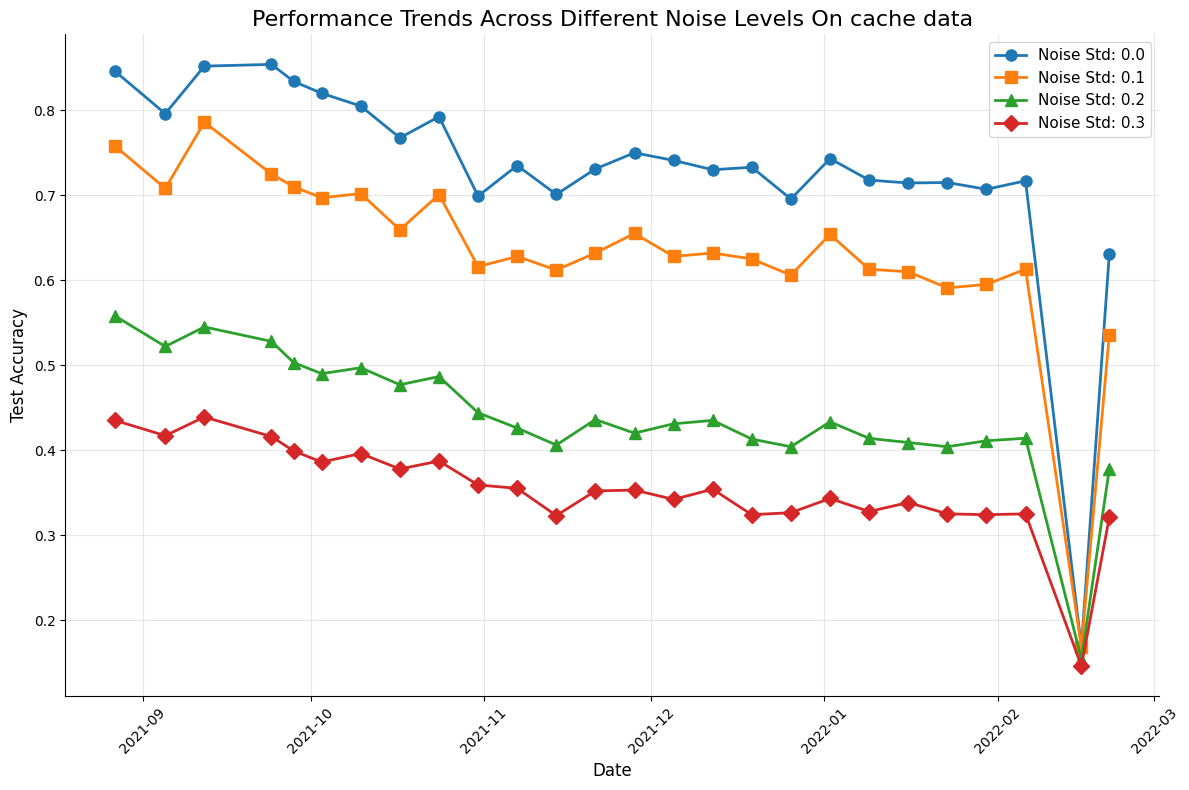

In [20]:
import matplotlib.pyplot as plt
from datetime import datetime
import pandas as pd


# Convert date strings to datetime objects for proper plotting
def convert_dates(date_dict):
    dates = []
    values = []
    for date_str, value in date_dict.items():
        date_obj = datetime.strptime(date_str, '%Y_%m_%d')
        dates.append(date_obj)
        values.append(float(value))
    return dates, values

# Create the plot
plt.figure(figsize=(12, 8))

# Colors for different trend lines
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']
markers = ['o', 's', '^', 'D']

# Plot each trend line
for i, (key, values_dict) in enumerate(results.items()):
    dates, values = convert_dates(values_dict)
    # Plot the data points and line
    plt.plot(dates, values,
             color=colors[i],
             marker=markers[i],
             linewidth=2,
             markersize=8,
             label='; '.join([f"{k.replace('_', ' ').title()}: {v}" for k,v in json.loads(key).items()]))

# Customize the plot
plt.title(f'Performance Trends Across Different Noise Levels On {attack_vector} data', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Test Accuracy', fontsize=12)
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)

# Format x-axis dates
plt.xticks(rotation=45)
plt.tight_layout()

# Add some styling
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Show the plot
plt.show()